<a href="https://colab.research.google.com/github/GuysBarash/MLBook/blob/main/ex_622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Parameters
x_mean = 0
x_variance = 1  # This is epsilon, set to epsilon = 1

t_mean = 0
t_variance = 100

z_mean = 0
z_variance = 1000

n = 10000  # Number of samples

In [53]:
# Generate databases
X = np.random.normal(x_mean, x_variance, n)
T = np.random.normal(t_mean, t_variance, n)
Z = np.random.normal(z_mean, z_variance, n)
df = pd.DataFrame(columns=['X', 'T', 'Z'], index=range(n), data=np.array([X, T, Z]).T)

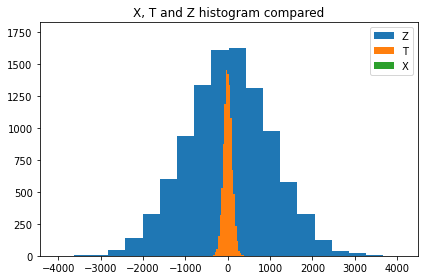

In [54]:
n_bins = 20
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(Z, bins=n_bins,label='Z')
axs.hist(T, bins=n_bins,label='T')
axs.hist(X, bins=n_bins,label='X')

plt.title("X, T and Z histogram compared")
plt.legend()
plt.show()

In [55]:
# Create Y = X + T + Z
df['Y'] = df.sum(axis=1)

# Create Y' = Average(X) + T + Z
X_avg = df['X'].sum() / n
df['Y\''] = X_avg + df[['T', 'Z']].sum(axis=1)

# Compare Y and Y'
Y_diff = df['Y'] - df['Y\'']

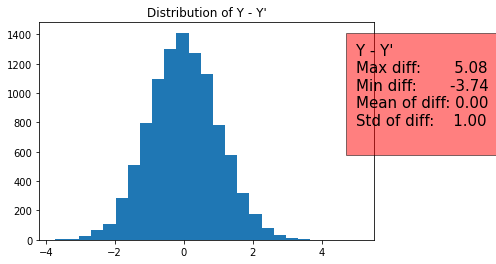

In [56]:
n_bins = 25
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=False)

mx = Y_diff.max()
min = Y_diff.min()
mean = Y_diff.mean()
std = Y_diff.std()

msg = f'Y - Y\'' + '\n'
msg += f'Max diff:       {mx:>.2f}' + '\n'
msg += f'Min diff:       {min:>.2f}' + '\n'
msg += f'Mean of diff: {mean:>.2f}' + '\n'
msg += f'Std of diff:    {std:>.2f}' + '\n'

axs.hist(Y_diff, bins=n_bins)
axs.text(5,int(n/15),msg,bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10},size=15)

plt.title("Distribution of Y - Y\'")
plt.show()